There’s a lot of difference between building a machine learning model and deploying it to production to see how it works, as the two jobs differ in both profession and skill set.

A machine learning engineer or a data scientist is the one who creates a machine learning model and a software developer or a web developer is a person responsible for deploying the machine learning model.

When working on a machine learning task, as a data scientist or machine learning engineer, we have to focus a lot on exploratory data analysis, data preparation, feature engineering, tuning of hyper-parameters and model selection. In the process, we only focus on improving the accuracy of the model, but we forget the main objective which is to extract some values generated from the machine learning model in real-time, which cannot be done without deploying it to a user interface-based system.

Deploying a machine learning model means preparing it for end-user use. To deploy machine learning models, we are faced with such issues that not all data scientists are familiar with languages such as HTML and CSS. But in the section below, we’ll walk through how to easily deploy a machine learning model using Python, HTML, and CSS.

We will first train a machine learning model for SMS Spam detection. The SMS spam detection model will classify spam and not spam messages.

At the end of this project, we will be able to copy and paste our messages in the user interface and the application will show whether it’s spam or not.

To Deploy a model using Python, HTML and CSS we need 4 files, namely:

* `App.py`: The driver code, which will consist of the code to train a machine learning model and creating a flask API.
* `home.html`: which will be a landing page where we will deploy our model.
* `style.css`: which will be used to design our landing page
* `result.html`: which will show us the result whether the message is spam or not.

Now let’s train and deploy our model by creating the first file that is **app.py**. Before we start writing code make sure that we create all these folders as mentioned below and add the **home.html and result.html** files in the **templates** folder. Likewise, we need to add the **style.css** file in the **static** folder.

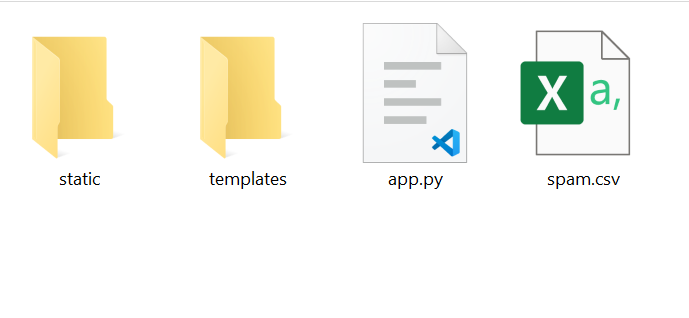

# app.py:

In [2]:
from flask import Flask,render_template,url_for,request
import pandas as pd 
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
#from sklearn.externals import joblib
import joblib


app = Flask(__name__)

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/predict',methods=['POST'])
def predict():
    df= pd.read_csv("spam.csv", encoding="latin-1")
    df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
    # Features and Labels
    df['label'] = df['class'].map({'ham': 0, 'spam': 1})
    X = df['message']
    y = df['label']

    # Extract Feature With CountVectorizer
    cv = CountVectorizer()
    X = cv.fit_transform(X) # Fit the Data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    #Naive Bayes Classifier
    from sklearn.naive_bayes import MultinomialNB

    clf = MultinomialNB()
    clf.fit(X_train,y_train)
    clf.score(X_test,y_test)
    #Alternative Usage of Saved Model
    # joblib.dump(clf, 'NB_spam_model.pkl')
    # NB_spam_model = open('NB_spam_model.pkl','rb')
    # clf = joblib.load(NB_spam_model)

    if request.method == 'POST':
        message = request.form['message']
        data = [message]
        vect = cv.transform(data).toarray()
        my_prediction = clf.predict(vect)
    return render_template('result.html',prediction = my_prediction)



if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### home.html:

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Home</title>
    <!-- <link rel="stylesheet" type="text/css" href="../static/css/styles.css"> -->
    <link rel="stylesheet" type="text/css" href="{{ url_for('static', filename='css/styles.css') }}">
</head>
<body>

    <header>
        <div class="container">
        <div id="brandname">
            Machine Learning App with Flask
        </div>
        <h2>Spam Detector For SMS Messages</h2>

    </div>
    </header>

    <div class="ml-container">

        <form action="{{ url_for('predict')}}" method="POST">
        <p>Enter Your Message Here</p>
        <!-- <input type="text" name="comment"/> -->
        <textarea name="message" rows="4" cols="50"></textarea>
        <br/>

        <input type="submit" class="btn-info" value="predict">

    </form>

    </div>




</body>
</html>

### style.css:

In [ ]:
body{
    font:15px/1.5 Arial, Helvetica,sans-serif;
    padding: 0px;
    background-color:#f4f3f3;
}

.container{
    width:100%;
    margin: auto;
    overflow: hidden;
}

header{
    background:#03A9F4;#35434a;
    border-bottom:#448AFF 3px solid;
    height:120px;
    width:100%;
    padding-top:30px;

}

.main-header{
            text-align:center;
            background-color: blue;
            height:100px;
            width:100%;
            margin:0px;
        }
#brandname{
    float:left;
    font-size:30px;
    color: #fff;
    margin: 10px;
}

header h2{
    text-align:center;
    color:#fff;

}



.btn-info {background-color: #2196F3;
    height:40px;
    width:100px;} /* Blue */
.btn-info:hover {background: #0b7dda;}


.resultss{
    border-radius: 15px 50px;
    background: #345fe4;
    padding: 20px; 
    width: 200px;
    height: 150px;
}

### result.html:

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title></title>
    <link rel="stylesheet" type="text/css" href="{{ url_for('static', filename='css/styles.css') }}">
</head>
<body>

    <header>
        <div class="container">
        <div id="brandname">
            ML App
        </div>
        <h2>Spam Detector For SMS Messages</h2>

    </div>
    </header>
    <p style="color:blue;font-size:20;text-align: center;"><b>Results for Comment</b></p>
    <div class="results">



    {% if prediction == 1%}
    <h2 style="color:red;">Spam</h2>
    {% elif prediction == 0%}
    <h2 style="color:blue;">Not a Spam (It is a Ham)</h2>
    {% endif %}

    </div>

</body>
</html>